# Qiskit 설치 및 수업 준비

## 필수 패키지 설치

최신 버젼의 Qiskit을 설치하는 것! 헷갈리신다면 다음의 순서를 따라해보세요 

1. [아나콘다 설치](https://www.anaconda.com/)

    1-1. 만약 오래된 아나콘다가 설치되어 있다면 터미널을 열어 다음의 명령어를 실행해 보세요

    `conda update -n base conda`
    
2. 환경 만들기

`conda create -n qiskit python=3.10`

3. 쥬피터 노트북 혹은 쥬피터 랩 설치

`conda install jupyter notebook` 혹은 `conda install jupyterlab`

4. qiskit_ibm_provider 설치

`pip install qiskit qiskit_ibm_provider`

5. qiskit-ibm-runtime 설치

`pip install qiskit-ibm-runtime`

6.  Qiskit 설치 (머신러닝, 파이낸스 등 모든 라이브러리 한번에 설치)

`pip install 'qiskit[all]'`

## 패키지 설치 확인
설치가 잘 되었는지 다음의 명령어를 실행해서 확인해 봅시다.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [1]:
# 필수 라이브러리 불러오기 

import numpy as np
from math import sqrt, pi

from qiskit import *
from qiskit.visualization import plot_histogram, plot_distribution, plot_error_map
from qiskit.visualization.array import array_to_latex
from qiskit.quantum_info import Operator, Statevector, random_statevector

from qiskit_ibm_provider import IBMProvider

from qiskit_aer import AerSimulator, StatevectorSimulator

import matplotlib.pyplot as plt


 ## Bit and Qubit

여러분의 휴대폰, 컴퓨터 등과 같은 디지털 기기들은 모두 0과 1로 데이터를 구축하고 있습니다. 우리가 컴퓨터화면을 통해 보는 이미지나 유튜브를 통해 듣는 음악, 키보드의 입력등은 모두 컴퓨터의 중앙처리장치에서 0과 1의 무수한 조합으로 구성되며 0과 1에 대한 논리 연산을 통해 처리됩니다. 아래의 셀에 여러분의 한글 이름을 입력하고 Shift+Enter를 눌러서 실행시켜 보세요. 여러분의 이름은 저렇게 많은 0과 1로 표현되고 있습니다.

In [2]:
st = "신소영"
' '.join(format(x, 'b') for x in bytearray(st, 'utf-8'))


'11101100 10001011 10100000 11101100 10000110 10001100 11101100 10011000 10000001'

하나의 비트는 한번에 0 또는 1의 값을 가질 수 있습니다. 마치 스위치를 켜고 끄는 것과 같습니다. 

이에 비해 양자컴퓨터는 큐비트라고 불리는, 양자 역학적인 성질를 지니는 연산 단위를 계산에 사용합니다. 큐비트가 비트와 구별되는 가장 큰 특성은 0과 1을 동시에 가질 수 있다는 점 입니다. 큐비트도 일반 비트처럼 0과 1상태를 지닙니다. 큐비트의 상태는 복소수 벡터로 주로 표현되기 때문에 $|0\rangle$과 $|1\rangle$로 0과 1상태를 표현하며, 큐비트가 가질 수 있는 무한히 가능한 상태들 중 이 두 상태는 계산의 기본이 되는 `계산 기저`라고 부르고, 양자 회로를 구성하여 측정할 경우 큐비트의 상태는 이 둘 중의 하나로만 측정될 수 있습니다.

큐비트는 0과 1의 상태를 동시에 가질 수 있는 크기가 1인 복소수 벡터이기 때문에, 다음과 같이 일반적으로 표현합니다. 

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$

이때 $\psi$는 큐비트의 임의의 양자상태를 표현하는 기호로 사용되고 있으며 이 임의의 상태가 갖는 $|0\rangle$ 상태의 계수를 $\alpha$,  $|1\rangle$ 상태의 계수를 $\beta$라 정의하며 이 두 계수는 허수부를 갖는 복소수 입니다. 큐비트를 측정하면 0 또는 1의 상태로 측정되며 각각 측정될 확률($|\alpha|^2$과 $|\beta|^2$)을 더하면 1이 되어야 하는 조건을 지니고 있습니다. 이 조건은 다음과 같이 식으로 표현할 수있습니다. 

$$|\alpha|^2+ |\beta|^2 = 1$$ 

큐비트의 계산 기저 역시 벡터형태로 존재하기 때문에, 다음과 같이 행렬로 정의 됩니다.

$$
|0\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix} , 
|1\rangle =  
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$$

따라서 $\psi$는 다음과 같이 행렬로 표현할 수 있습니다.

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
$$

위와 같이 큐비트의 상태를 두개의 복소수로 표현하게 되면, (a + bi), (c + di)와 같이 총 네개의 실수가 필요하게 됩니다. 하지만 두 계수의 절대값의 제곱의 합이 1이 된다는 조건을 활용하여 삼각함수를 적용하면, 큐비트의 상태는 다음과 같이 두 개의 실수 ($\theta$, $\phi$)만으로 정의할 수 있게 됩니다.

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

그리고 이렇게 정의된 큐비트의 상태는 반지름이 1인 원위의 점으로 표현할 수 있어지며, 이것이 큐비트의 상태를 표현하기 위해 자주 사용되는 블로흐 구면입니다.

<img src="https://user-images.githubusercontent.com/62553200/125445676-0d502818-1341-482c-9291-a38d652469be.png" alt="Alternative text" width=300/>


지금부터, 다음 실습에 필요한 단일 / 다중 양자게이트들의 기능을 Qiskit을 사용해 구현해 보고 그 동작을 블로흐 구면을 사용해 확인해 보겠습니다. 먼저 단일 큐비트 게이트부터 시작해 봅시다.

### Single Qubit Gate

#### X Gate

X게이트는 큐비트의 상태를 반전시킵니다. 즉 $X|0\rangle = |1\rangle$, $X|1\rangle = |0\rangle$을 만족하기 때문에 일반적으로 bit-flip 게이트로 불립니다.

$$
X = 
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
$$

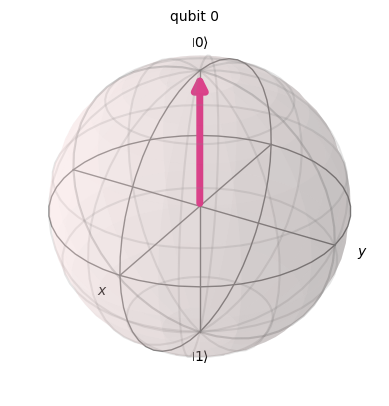

In [3]:
x_gate = QuantumCircuit(1)
Statevector(x_gate).draw('bloch')

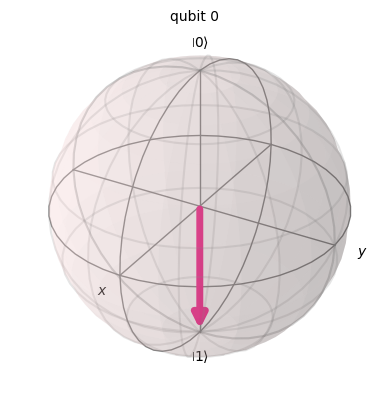

In [4]:
x_gate.x(0)
Statevector(x_gate).draw('bloch')

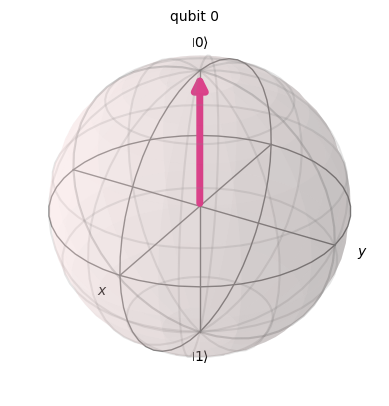

In [5]:
x_gate.x(0)
Statevector(x_gate).draw('bloch')

#### Y Gate

$Y$ 게이트는 큐비트의 상태를 블로흐 구면의 Y축을 기준으로 $\pi/2$ 만큼 회전하며 다음과 같이 정의 됩니다:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
$$

$$
Y  =  -i|0\rangle\langle 1| + i|1\rangle \langle 0|
$$

$$Y|0\rangle = i|1\rangle$$
$$Y|1\rangle = -i|0\rangle$$

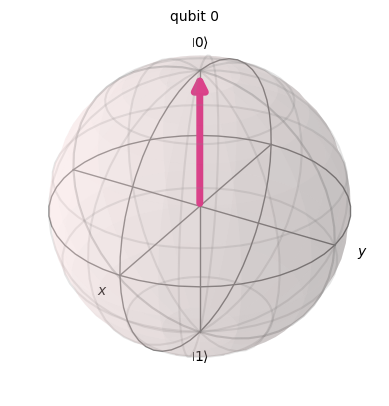

In [6]:
y_gate = QuantumCircuit(1)
Statevector(y_gate).draw('bloch')

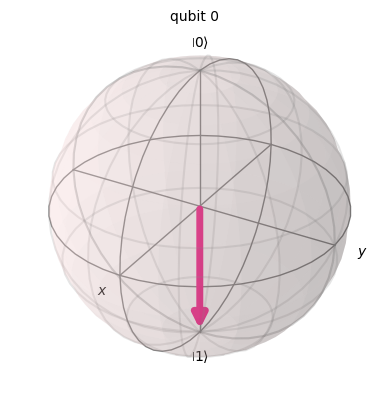

In [7]:
y_gate.y(0)
Statevector(y_gate).draw('bloch')

#### $Z$: phase-flip 게이트

$Z$ 게이트는 위상 반전 게이트로 불리며 다음과 같이 정의됩니다:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

$$
Z  =  |0\rangle\langle 0| + -|1\rangle \langle 1|
$$

$$Z|0\rangle = |0\rangle$$
$$Z|1\rangle = -|1\rangle$$

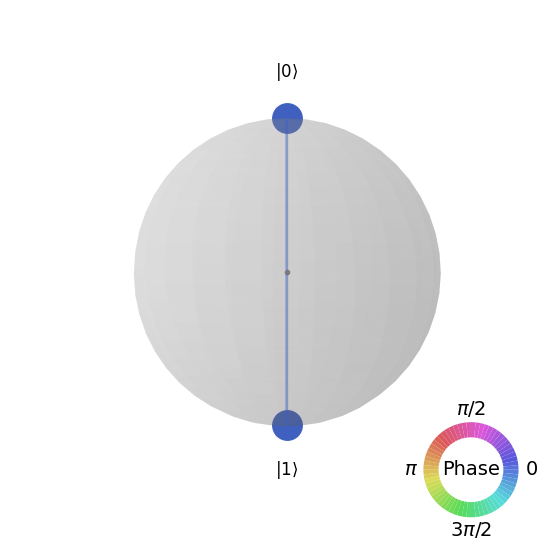

In [8]:
z_gate = QuantumCircuit(1)
z_gate.h(0)  
Statevector(z_gate).draw('qsphere')

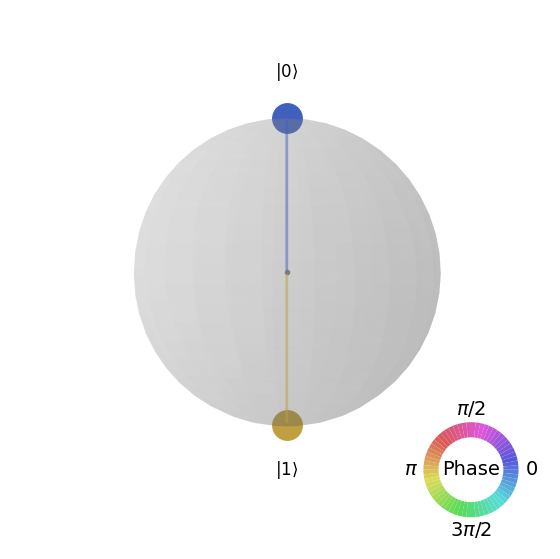

In [9]:
z_gate.z(0)  
Statevector(z_gate).draw('qsphere')

#### Hadamard Gate

하다마드 게이트는 x축과 z축의 중간 지점을 기준으로 $\pi$만큼 큐비트의 상태를 회전하는 것과 같습니다. 하다마드 게이트는 $|0\rangle$ 상태를 $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$로, $|1\rangle$ 상태를 $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$로 변환하며 그 반대도 성립하기 때문에 일반적으로 뒤의 상태를 각각 $|+\rangle$와 $|-\rangle$ 상태로 부르기 때문에, $|0\rangle$과 $|1\rangle, $|+\rangle$와  $|-\rangle$ 사이의 변환이라고 표현 하기도 합니다. 

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

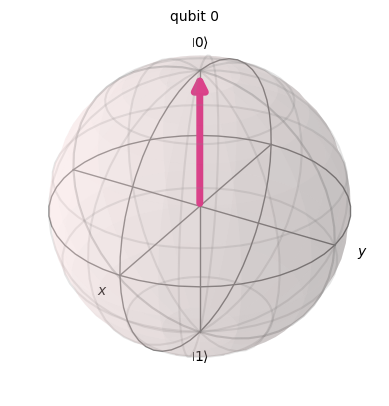

In [10]:
h_gate = QuantumCircuit(1)
Statevector(h_gate).draw('bloch')

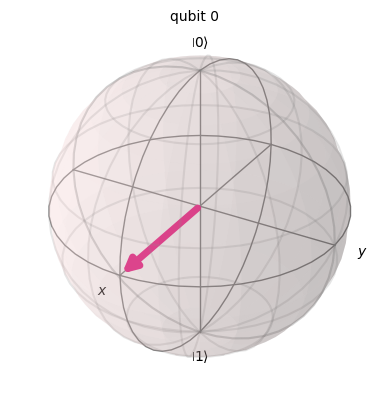

In [11]:
h_gate.h(0)
Statevector(h_gate).draw('bloch')

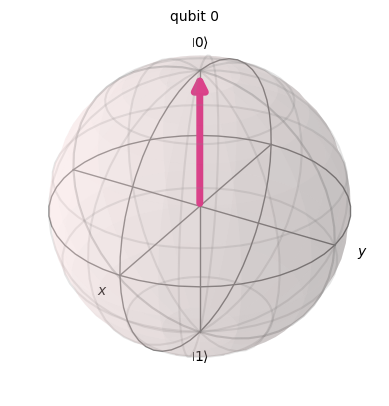

In [12]:
h_gate.h(0)
Statevector(h_gate).draw('bloch')

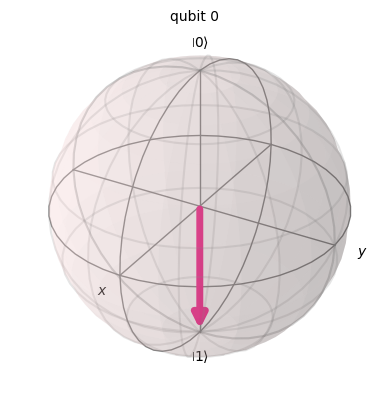

In [13]:
h_gate.x(0)
Statevector(h_gate).draw('bloch')

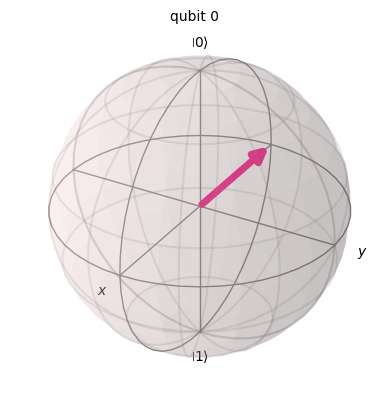

In [14]:
h_gate.h(0)
Statevector(h_gate).draw('bloch')

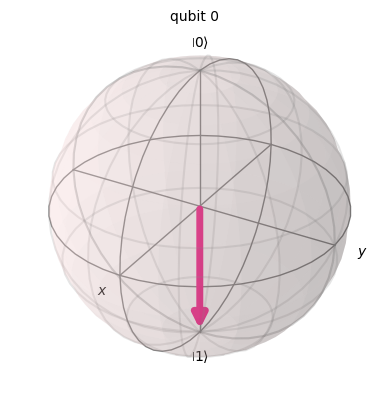

In [15]:
h_gate.h(0)
Statevector(h_gate).draw('bloch')

### Multi Qubit Gate

다중 큐비트 게이트를 알아보기 전, 다중 큐비트 상태의 표현법 (tensor product)에 대해 알아봅시다. 두개의 큐비트로 이루어진 시스템을 생긱하 봅시다. 
$A$와 $B$가 각각의 큐비트에 작용한다고 할때 두 연산자의 텐서곱 $A \otimes B$은 다음과 같습니다.

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

같은 방식으로 2 큐비트 시스템의 계산 기저도 같은 방식으로 단일큐비트의 계산 기저로 부터 만들어 집니다. 

$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$


#### Controlled Gate

대부분의 2 큐비트 게이트들은 SWAP 게이트를 제외하면 대부분 제어 연산의 형태입니다. 일반적으로 제어 연산의 경우 제어 비트와 대상 비트, 그리고 대상 비트에 적용될 단일 큐비트 유니터리 연산자 $U$ 로 정의됩니다. 
임의의 $U$를 다음과 같이 생각해 봅시다.

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}$$

이 연산자를 사용한 제어 연산은 다음과 같이 생각 해 볼 수 있습니다. **control qubit**가 **qubit 0** 이고, **control qubit**가  **qubit 1**인 경우를 생각해 봅시다. 이 경우 제어 연산은 **qubit 0**이 1일때 $U$를  **qubit 1**에 적용하기 때문에 계산 기저는 다음과 같이 영향을 받게 됩니다. 

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
\end{align*}.$$

이것을 행렬의 형태로 작성해 보면 $C_{U}$연산은 다음과 같이 정리할 수 있습니다.

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}.
\end{equation}$$


이제 **qubit 1**이 제어 비트이고 **qubit 0** 대상 비트가 되는 경우를 생각해 봅시다. 이 경우 계산 기저는 

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|1\right\rangle}\\
\end{align*},$$

위와 같이 변하게 되고 이것을 행렬의 형태로 정리하면 아래와 같게 됩니다. 

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}.
\end{equation}$$

#### CX 게이트

이제 가장 많이 사용하게 되는 제어 연산 중 하나인 Controlled-X, CX 게이트에 대해서 살펴봅시다. CX 연산은 제어 큐비트가 1일때 X 게이트를 적용하는 연산으로 제어 큐비트가 큐비트 1, 대상 큐비트가 큐비트 0일때 위의 행렬식과 같이 아래와 같은 행렬식을 갖게 되며, 10과 11상태를 서로 교환하는 것으로 이해하기도 합니다.

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

반대로, 제어 큐비트가 큐비트 0, 대상 큐비트가 큐비트 1이라면 아래와 같아 지며 01과 11의 상태를 서로 교환하는 것으로 이해하기도 합니다.

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$

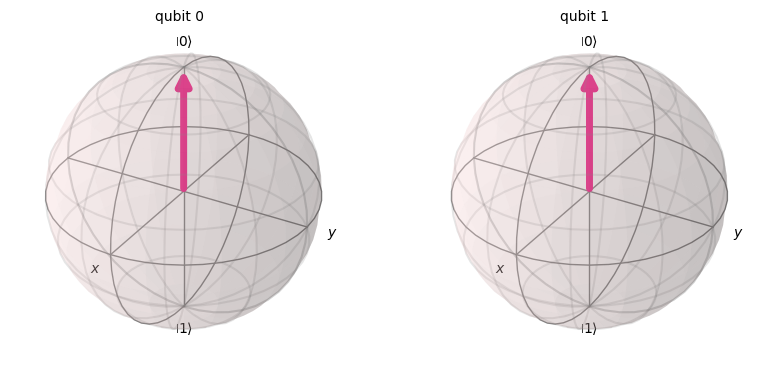

In [16]:
cx_gate = QuantumCircuit(2)
Statevector(cx_gate).draw('bloch')

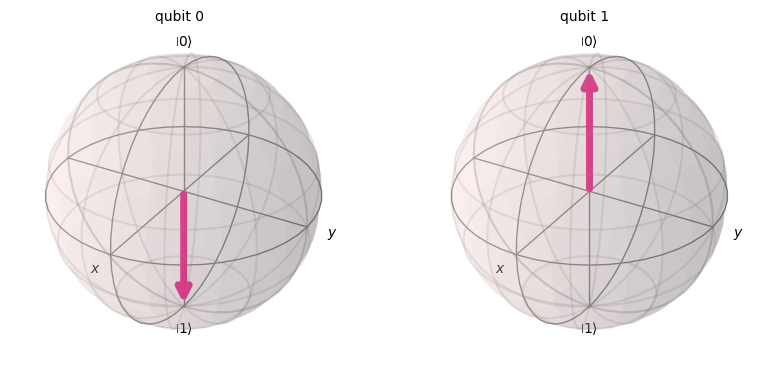

In [17]:
cx_gate.x(0)
Statevector(cx_gate).draw('bloch')

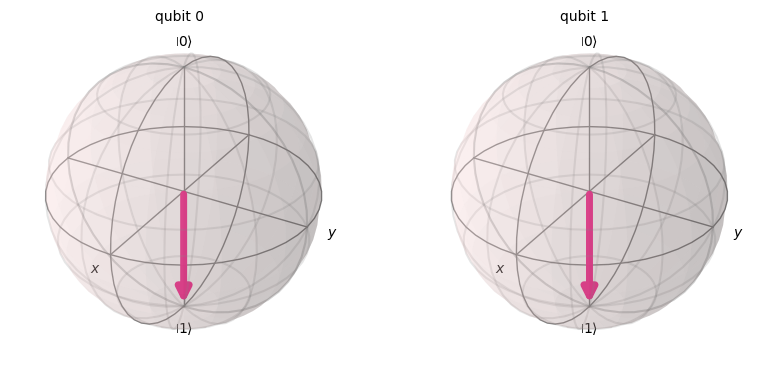

In [18]:
cx_gate.cx(0,1)
Statevector(cx_gate).draw('bloch')

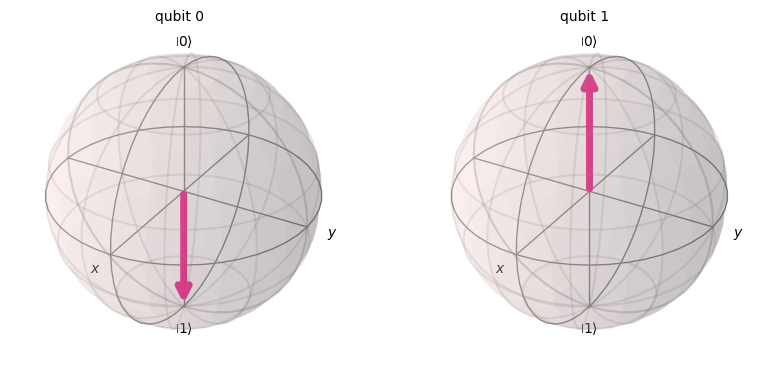

In [19]:
cx_gate.cx(0,1)
Statevector(cx_gate).draw('bloch')

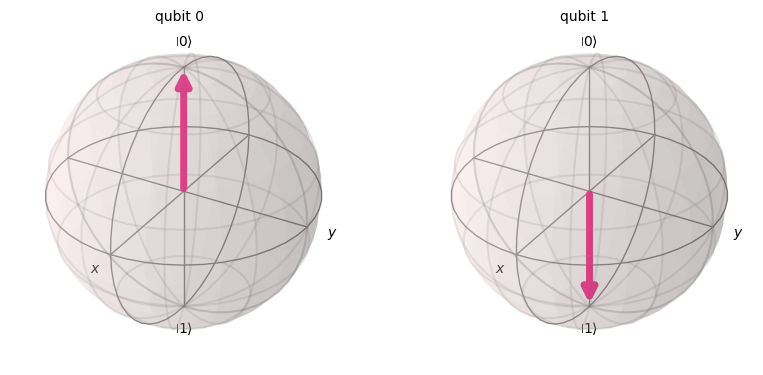

In [20]:
cx_gate.x([0,1])
Statevector(cx_gate).draw('bloch')

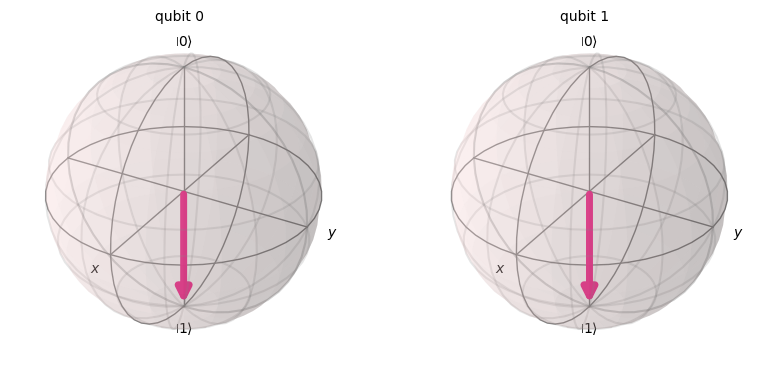

In [21]:
cx_gate.cx(1,0)
Statevector(cx_gate).draw('bloch')

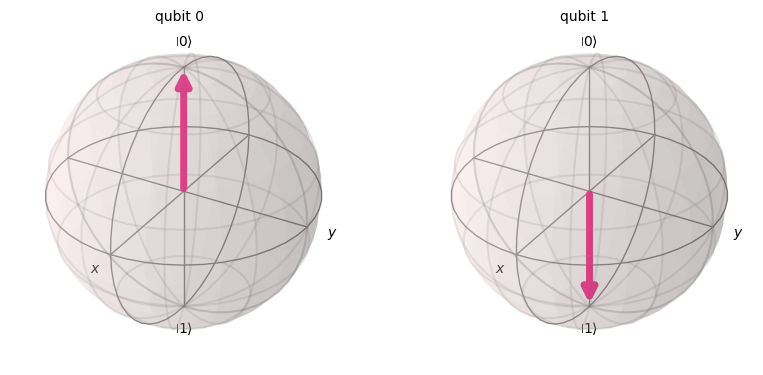

In [22]:
cx_gate.cx(1,0)
Statevector(cx_gate).draw('bloch')

#### SWAP gate

스왑 게이트는 두 큐비트의 상태를 통째로 교환합니다. 이 게이트는 계산 기저를 다음과 같이 변환합니다. 

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

이 연산은 행렬로 표현하면 다음과 같습니다. 

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

Swap 게이트의 성능을 확인하기 위해 각각의 큐비트를 임의의 상태벡터로 초기화 해보도록 합시다.

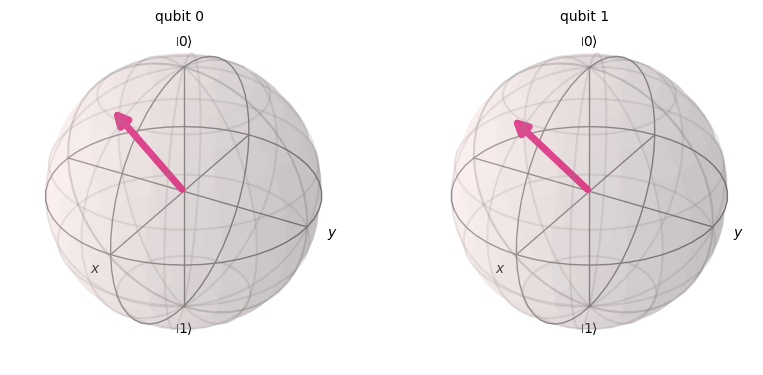

In [23]:
swap_gate = QuantumCircuit(2)
initial_1 = random_statevector(2)   
initial_2 = random_statevector(2)   
swap_gate.initialize(initial_1, 0)
swap_gate.initialize(initial_2, 1)
Statevector(swap_gate).draw('bloch')

In [24]:
array_to_latex(Statevector(swap_gate))

<IPython.core.display.Latex object>

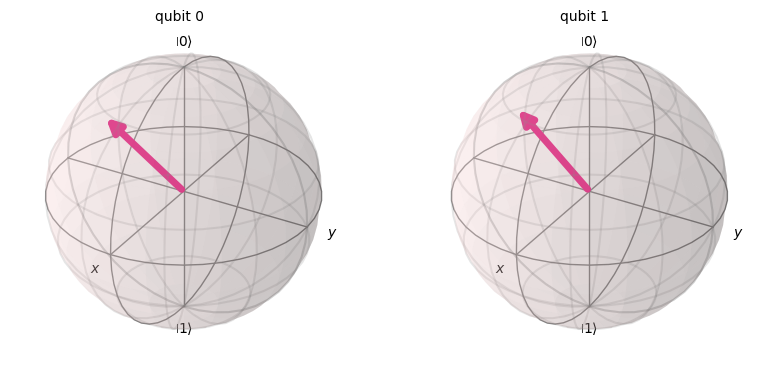

In [25]:
swap_gate.swap(0,1)
Statevector(swap_gate).draw('bloch')

In [26]:
array_to_latex(Statevector(swap_gate))

<IPython.core.display.Latex object>

### 측정


큐비트는 여러가지 중첩 가능한 상태로 초기화 되어 사용 될 수 있습니다. 하지만 한번 측정되고 난 후에는 $|0\rangle$이나 $|1\rangle$로 그 상태가 결정됩니다. 이것을 측정이 큐비트의 상태를 0또는 1로 붕괴시킨다고 표현하곤 합니다. 

다음의 실습에서 measurement를 포함하거나 포함하지 않은, 두가지 회로를 구성하고, 각 경우 최종 회로의 statevector값을 확인해 봅시다. 큐비트의 초기 값은  0과 1로 측정될 확률이 각각 50%에 해당하는 텍스트북에 제시된 상태를 사용하도록 하겠습니다.

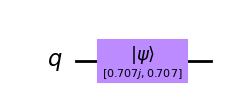

In [27]:
#측정이 없는 회로

qc_without_measurment = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc_without_measurment.initialize(initial_state, 0)
qc_without_measurment.draw('mpl')


In [28]:
backend = StatevectorSimulator()
backend.run(qc_without_measurment).result().get_statevector()

Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


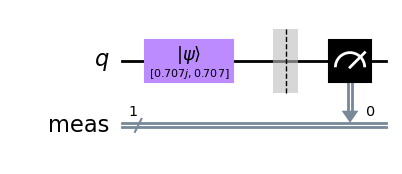

In [29]:

qc_with_measurment = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc_with_measurment.initialize(initial_state, 0)
qc_with_measurment.measure_all()
qc_with_measurment.draw('mpl')


In [30]:
backend = StatevectorSimulator()
backend.run(qc_with_measurment).result().get_statevector()

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


바로 위의 셀을 여러번 실행시켜 보면 statevector의 값이 0 또는 1에 해당하게 계속 변하는 것을 볼수있습니다. 마치 동전던지기와 같습니다 :)

### A Note about Quantum Simulators

`qiskit_aer`는 Qiskit의 시뮬레이션 패키지로, 다음과 같은 시뮬레이터 들을 보유하고 있습니다
- [AerSimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.AerSimulator.html#qiskit_aer.AerSimulator)
- [QasmSimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.QasmSimulator.html#qiskit_aer.QasmSimulator)
- [StatevectorSimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.StatevectorSimulator.html#qiskit_aer.StatevectorSimulator)
- [UnitarySimulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.UnitarySimulator.html#qiskit_aer.UnitarySimulator)

이 중 `AerSimulator`는 회로를 실행하고 측정된 값의 count를 반환합니다. 노이즈가 없는 이상적인 시뮬레이션을 하며 실행의 기본값은 `shots=1024`로 회로를 1024번 실행하도록 하고 있습니다. 

### Bloch Sphere vs QSphere

Qiskit은 양자 상태를 visual하고, 직관적으로 보여주기 위해 세가지 라이브러리를 제공하고 있습니다. 
- [plot_bloch_vector](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html) (입력이 구면의 좌표, Cartesian or Spherical)
- [plot_bloch_multivector](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html) (입력이 statevector)
- [plot_state_qsphere](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html) (입력이 statevector)

다음의 실습에서는 임의의 양자상태를 생성하고, 세가지 라이브러리를 사용해 큐비트의 상태를 표현해 보도록 하겠습니다.

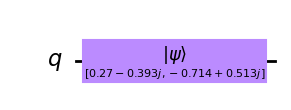

In [31]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_vector, plot_bloch_multivector

qc = QuantumCircuit(1)
initial_state = random_statevector(2) 
qc.initialize(initial_state, 0)

qc.draw('mpl')

In [32]:
def get_spherical_coordinates(statevector):
    # Convert to polar form:
    r0 = np.abs(statevector[0])
    ϕ0 = np.angle(statevector[0])

    r1 = np.abs(statevector[1])
    ϕ1 = np.angle(statevector[1])

    # Calculate the coordinates:
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

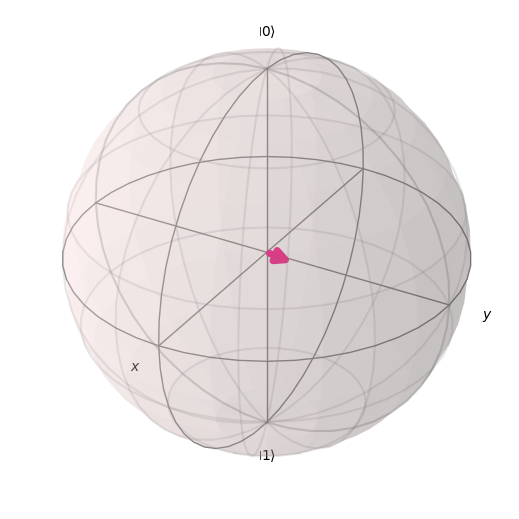

In [33]:
plot_bloch_vector(get_spherical_coordinates(initial_state), coord_type = 'spherical')

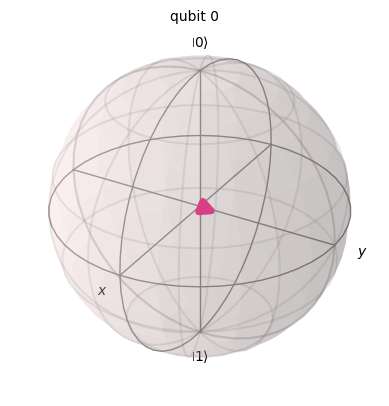

In [34]:
plot_bloch_multivector(initial_state)

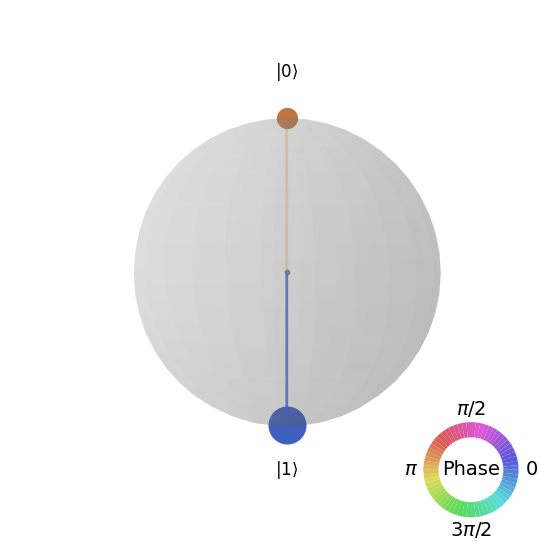

In [35]:
plot_state_qsphere(initial_state)

### Your first Quantum Circuit by using noisy simulator

이제 위에 설명된 기본 양자 게이트들을 사용해 여러분의 첫! 양자 회로를 만들어 보고 noisy simulator를 사용해서 실행해 봅시다. 

실행된 결과를 pixel 이미지로 그려봅시다. 

In [36]:
from qiskit.providers.fake_provider import FakeHanoi

backend = FakeHanoi()

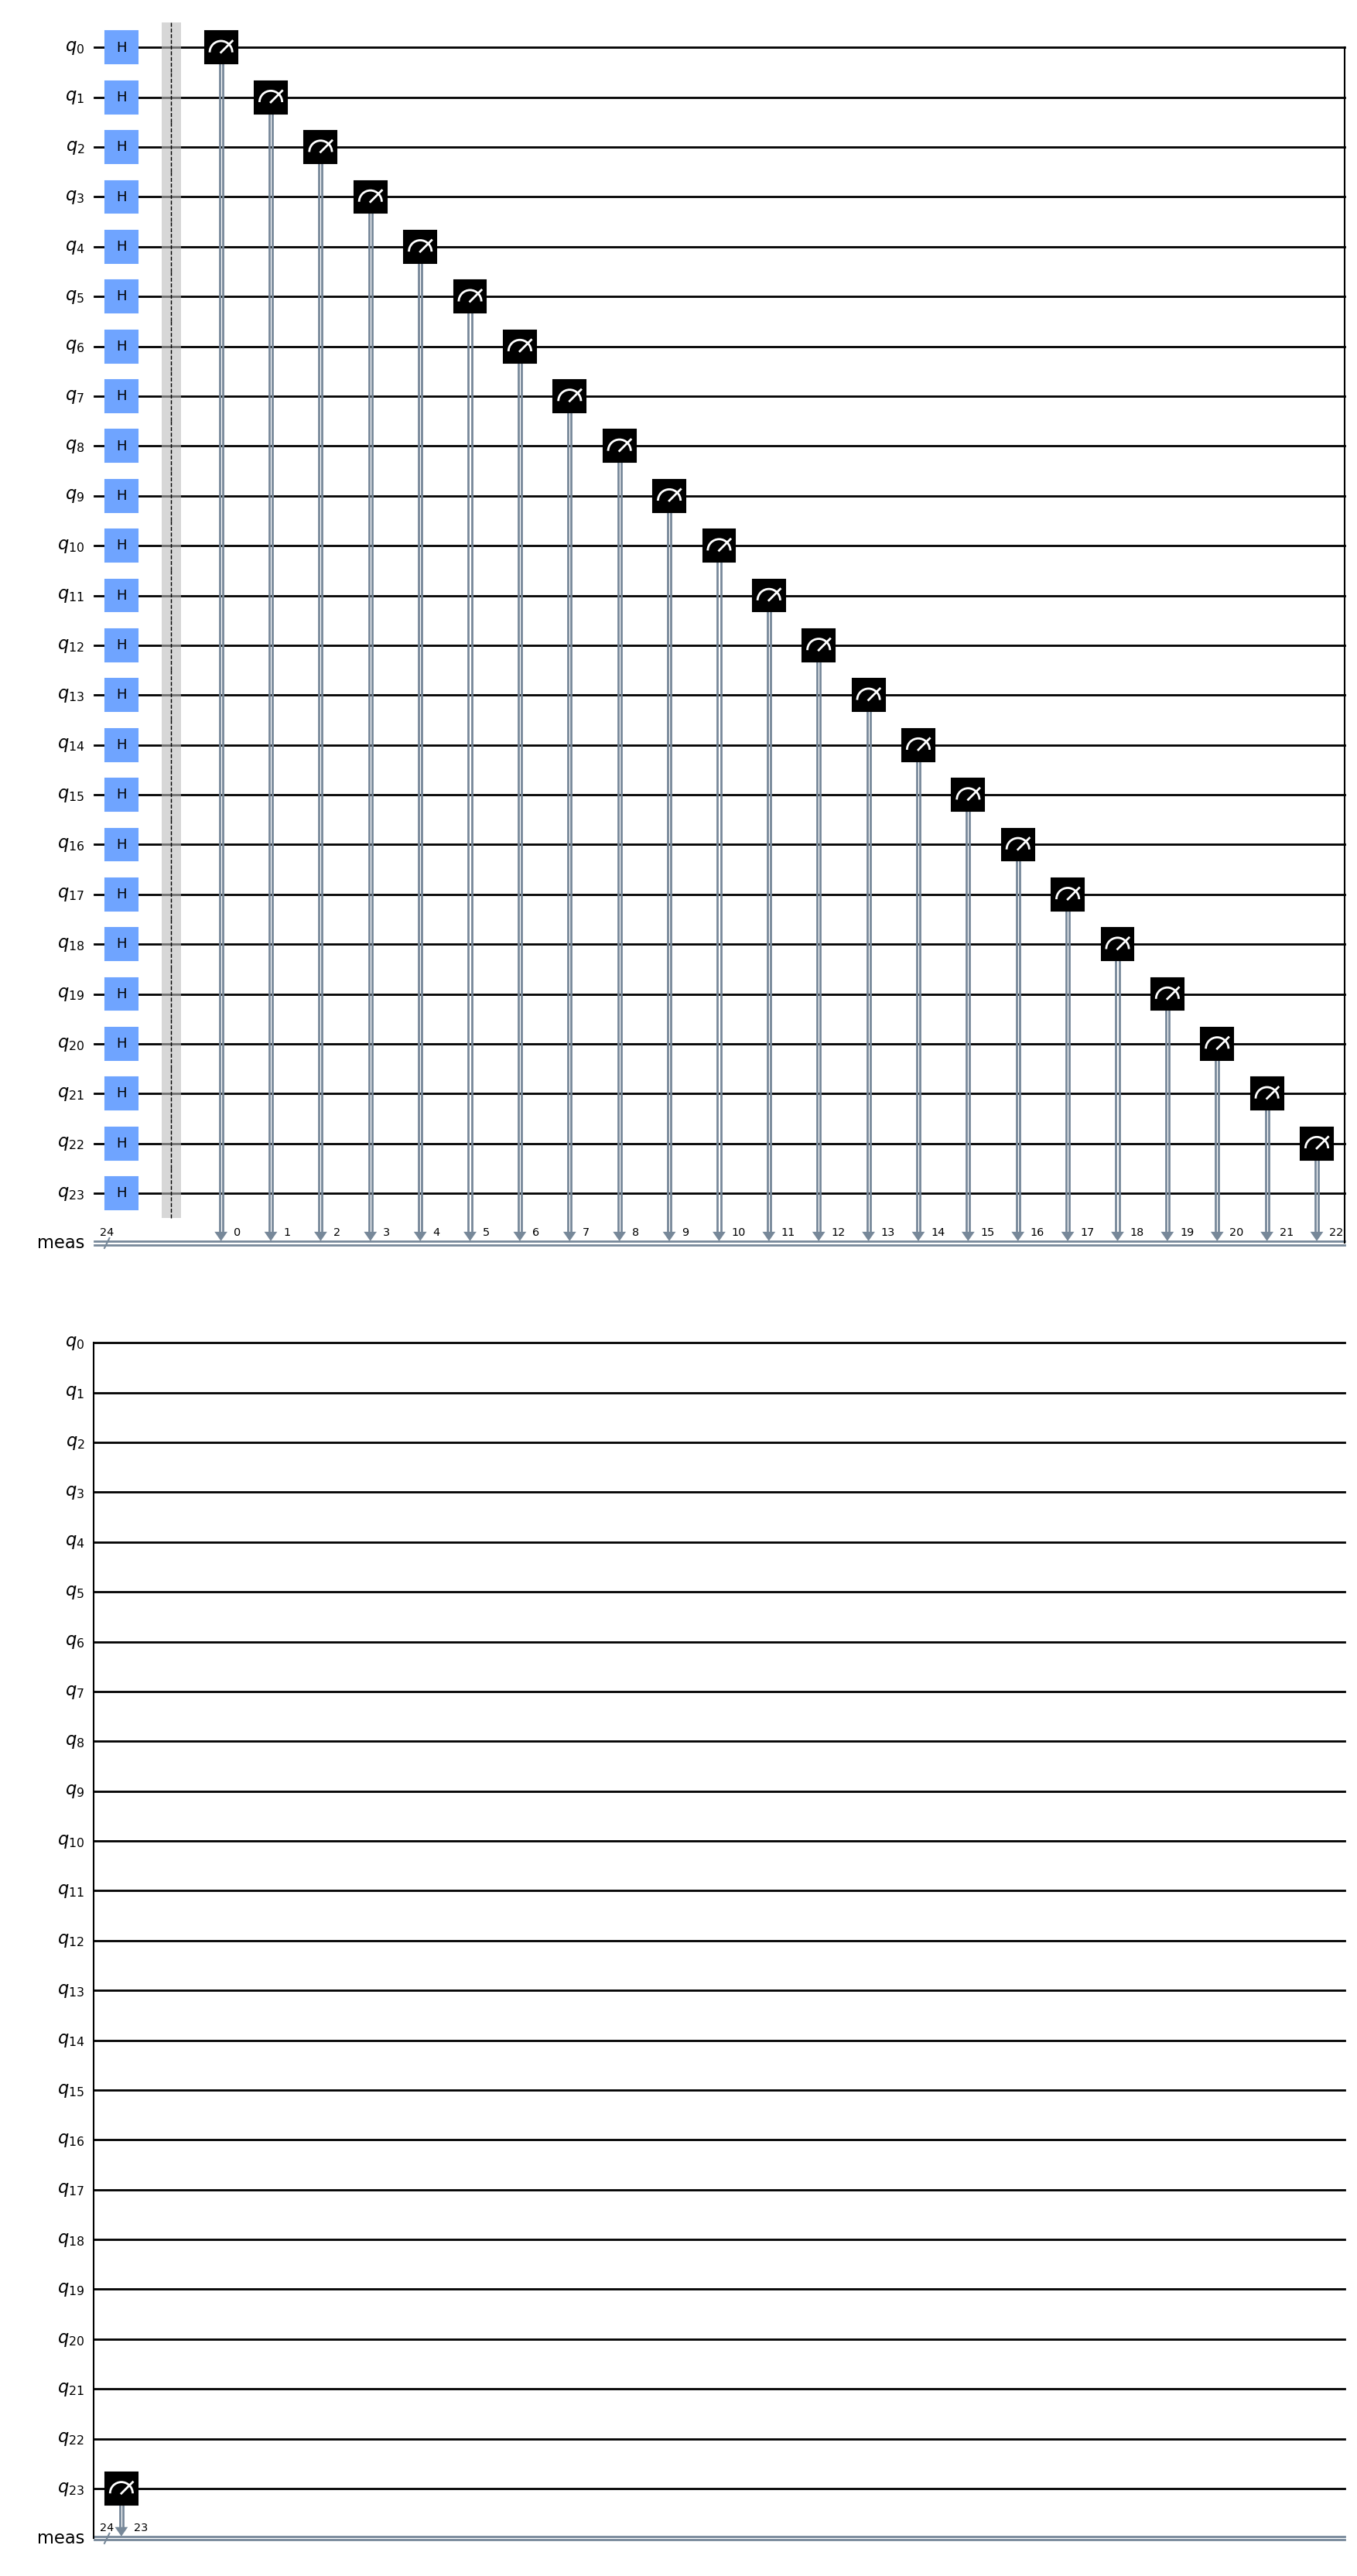

In [37]:
qc_rgb=QuantumCircuit(24)
qc_rgb.h(range(24))
qc_rgb.measure_all()
qc_rgb.draw('mpl')

In [38]:
job = backend.run(qc_rgb, shots = 10000, memory=True )
result = job.result().get_memory()

In [39]:
rgb= []
for i in range(10000):
    r = int(result[i][0:8], base=2)
    g = int(result[i][8:16], base=2)
    b = int(result[i][16:24], base=2)
    rgb.append([r, g, b])

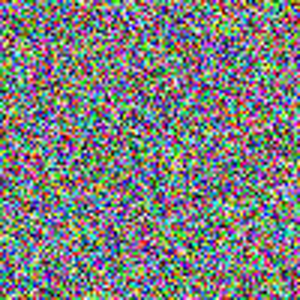

In [40]:
from PIL import Image

img_w, img_h = 100, 100
data = np.zeros((img_h, img_w , 3), dtype=np.uint8)
for i in range(100):
    for j in range(100):
        data[i , j] = rgb[i*100 + j]
scale = 3
img = Image.fromarray(data, 'RGB')
display(img.resize(( int(img.width * scale), int(img.height * scale))))
#display(img)